In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from IPython.display import Image
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt


In [8]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\Decision tree\winequality_red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
X = data.drop(columns = 'quality')
y = data['quality']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 355)

In [13]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
feature_name = list(X.columns)
class_name = list(y_train.unique)

In [16]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [17]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

In [18]:
clf.score(x_train,y_train)

1.0

In [ ]:
py_predict = clf.predict(x_test)

In [21]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.6395833333333333

Now we haven't done any prerocessing with our data and neither done any hyper parameter tunings.Let's do all those and see how our score improves.

When we do hyperparameter tuning, we basically try to find those sets and values of hyperparameters which will give us a model with maximum accuracy.
Let's go ahead and try to improve our model.

We will start with scaling our data.

In [22]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X) 

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state = 355)

Although our dataset is realtively small, let's use PCA for feature selection and see if it improves our accuracy.

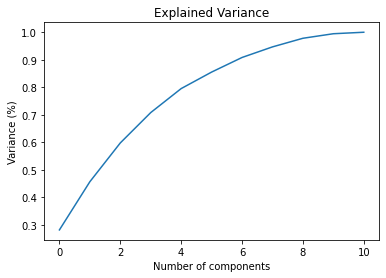

In [26]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
PrincipalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

We can see that around 95% of the variance is being explained by 8 components.
So instead of giving all 11 columns as input in our algorithm let's use these 8 principal components instead.

In [29]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(x_transform)
principal_x = pd.DataFrame(new_data, columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])

In [30]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258
...,...,...,...,...,...,...,...,...
1594,-2.150500,0.814286,0.617063,0.407687,-0.240936,0.054835,0.170812,-0.355866
1595,-2.214496,0.893101,1.807402,0.414003,0.119592,-0.674711,-0.607970,-0.247640
1596,-1.456129,0.311746,1.124239,0.491877,0.193716,-0.506410,-0.231082,0.079382
1597,-2.270518,0.979791,0.627965,0.639770,0.067735,-0.860408,-0.321487,-0.468876


In [31]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30,random_state = 355 )
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.56875

There is a little increase in our test accuracy. Great!!

Let's now try to tune some hyperparameters using the GridSearchCV algorithm.
We have studied about CrossValidation in upcoming lecture. 

GridSearchCV is a method used to tune our hyperparameters. We can pass different values of hyperparameters as parameters for grid search.
It does a exhaustive generation of combination of different parameters passed.
Using cross validation score, Grid Search returns the combination of hyperparameters for which the model is performing the best. 

In [34]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2,11,1),
    'min_samples_split' : range(2,7,1),
    'splitter': ['best','random']
}

In [35]:
grid_search = GridSearchCV(estimator=clf,
                           param_grid = grid_param,
                           cv=5,
                           n_jobs=-1)

In [36]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 11),
                         'min_samples_split': range(2, 7),
                         'splitter': ['best', 'random']})

In [38]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'splitter': 'best'}


In [39]:
grid_search.best_score_

0.5791199551569507

In [43]:
clf = DecisionTreeClassifier(criterion ='entropy',max_depth = 5, min_samples_split = 2,splitter = 'random' )
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='random')

In [44]:
clf.score(x_test,y_test)

0.53125

Great!! Our test score has improved after using Gridsearch.

Note : we must understand that giving all the hyperparameters in the gridSearch doesn't gurantee the best result. We have to do hit and trial with parameters to get the perfect score.

You are welcome to try tweaking the parameters more and try an improve the accuracy more.

 Let's visualize the tree:


In [45]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

In [46]:
import pickle
# Writing different model files to file
with open('modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf, f)
    
with open('standardscalar.sav', 'wb') as f:
    pickle.dump(scalar, f)
with open('pca_model.sav', 'wb') as f:
    pickle.dump(pca,f)

Let's see how well our model performs on the test data set.


In [48]:
y_pred = clf.predict(x_test)

In [49]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.53125

In [50]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,  12,   5,   0,   0],
       [  0,   0, 161,  52,   0,   0],
       [  0,   1, 100,  84,   6,   1],
       [  0,   0,  16,  28,  10,   0],
       [  0,   0,   1,   1,   0,   0]], dtype=int64)

In [51]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [ ]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative )
Accuracy